### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [ ]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdatestockDatabase()

* 建立「解盤」物件    

In [ ]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：加權指數續漲，接近前高。  
> 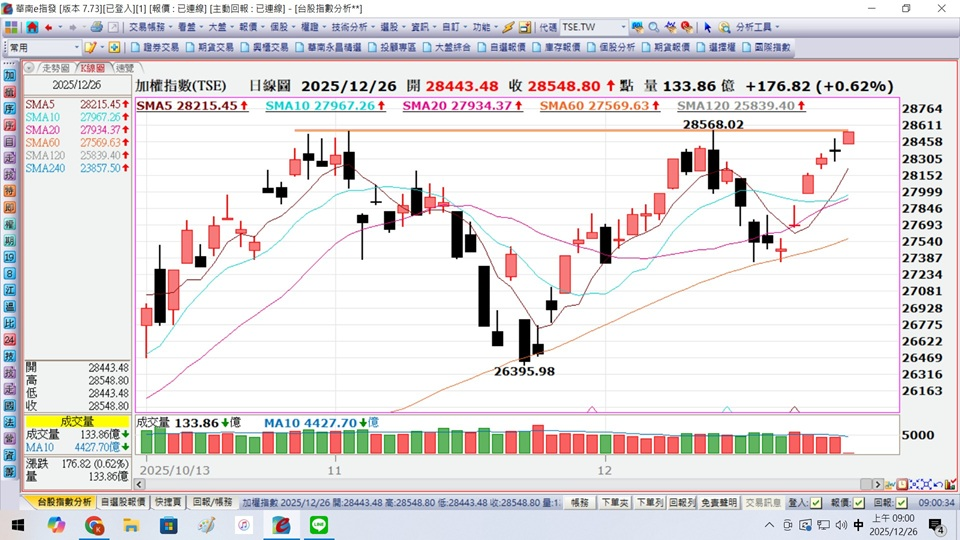  

In [2]:
# 壓力線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-10-29'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-12-11']['High']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)]
    ]

    linewidths=[1.0]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

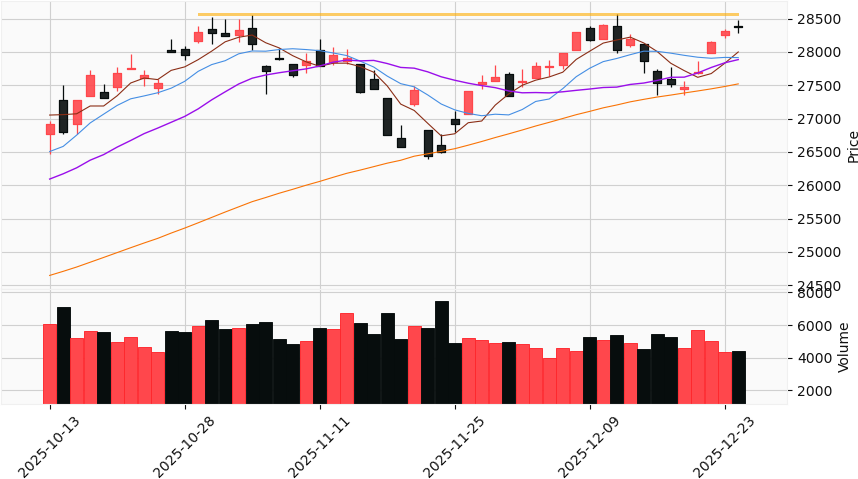

In [3]:
# 收盤：盤整區間
image = mysys.DrawOnKlineChart('TAIEX','2025-10-13','2025-12-24',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數站穩平台區第三天。  
> 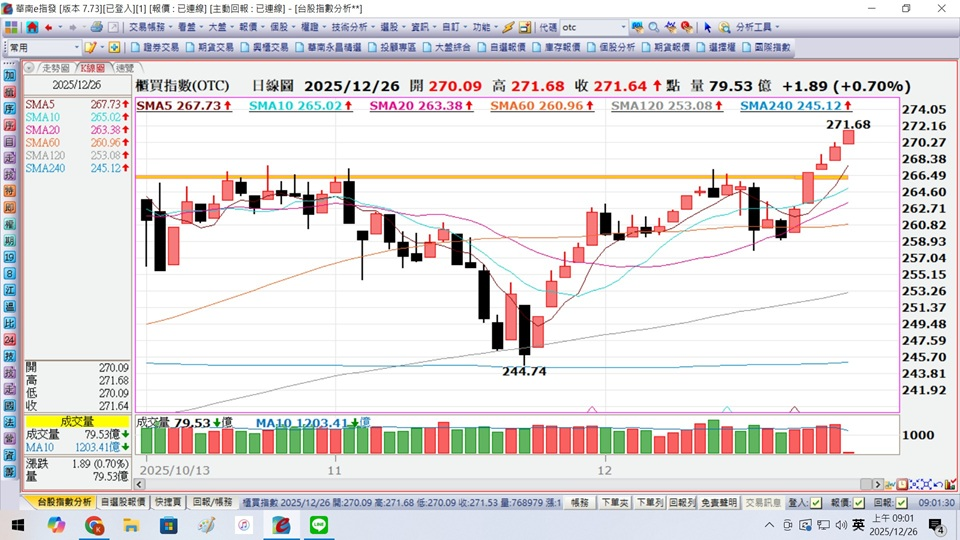  

In [20]:
# 壓力線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = range_prices.iloc[0].name.strftime("%Y-%m-%d")
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-11-03']['High']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)]
    ]

    linewidths=[2.0]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

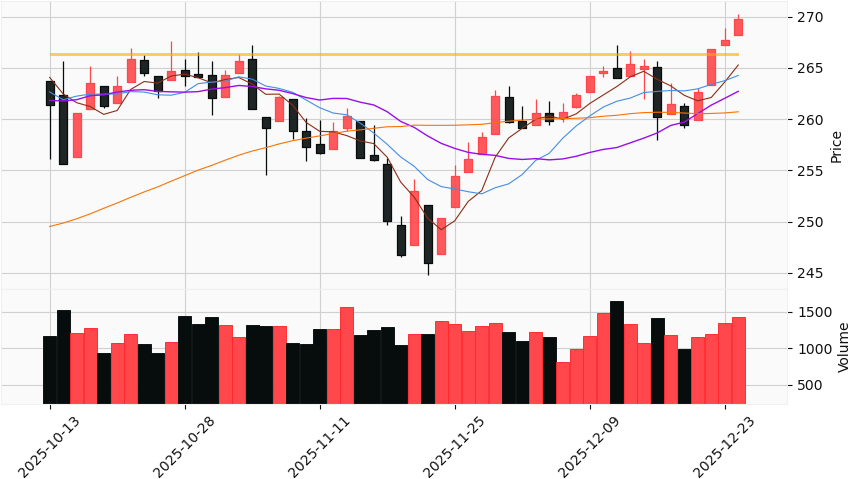

In [21]:
# 收盤：壓力線
image = mysys.DrawOnKlineChart('TPEx','2025-10-13','2025-12-24',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

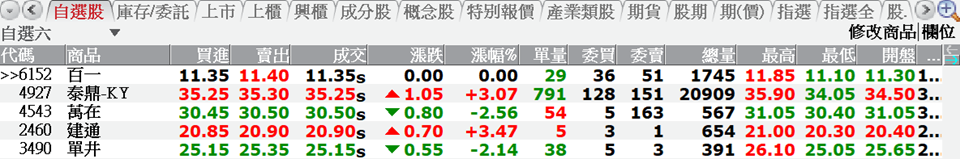  

* 環天科(3499)  
  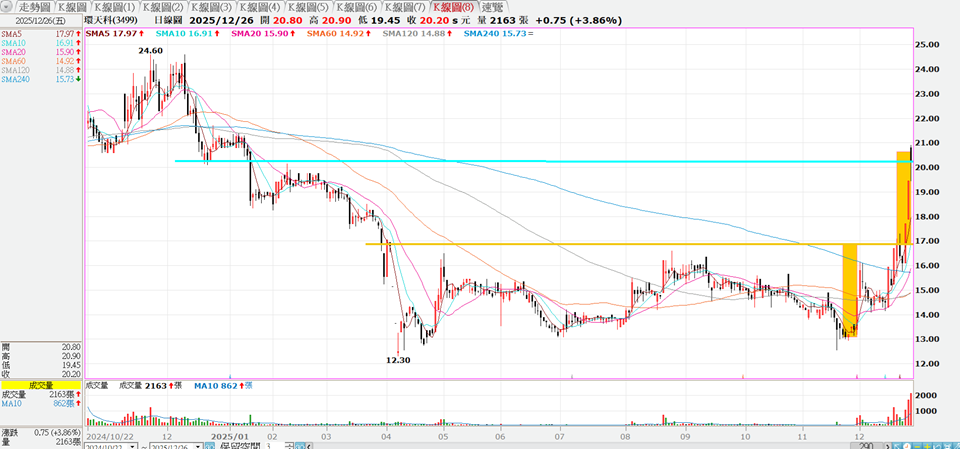  
* 力積電(6770)  
  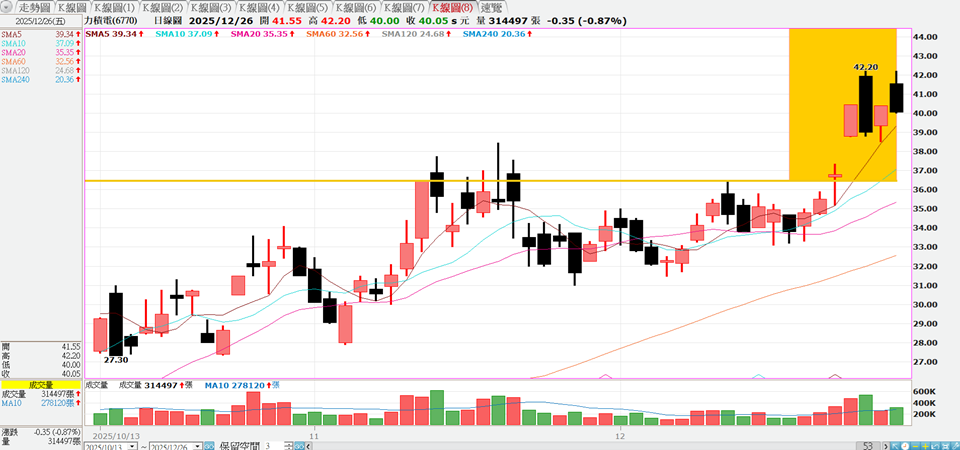  
* 磐亞(4707)  
  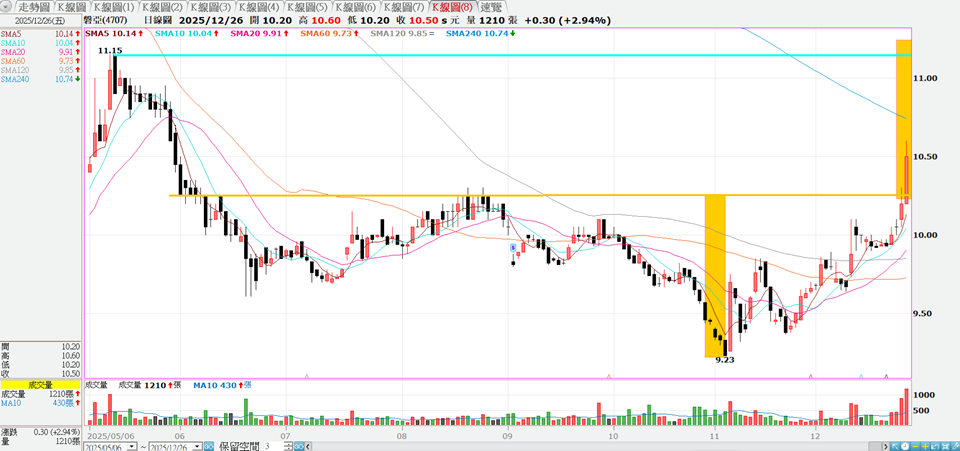  
* 建通(2460)  
  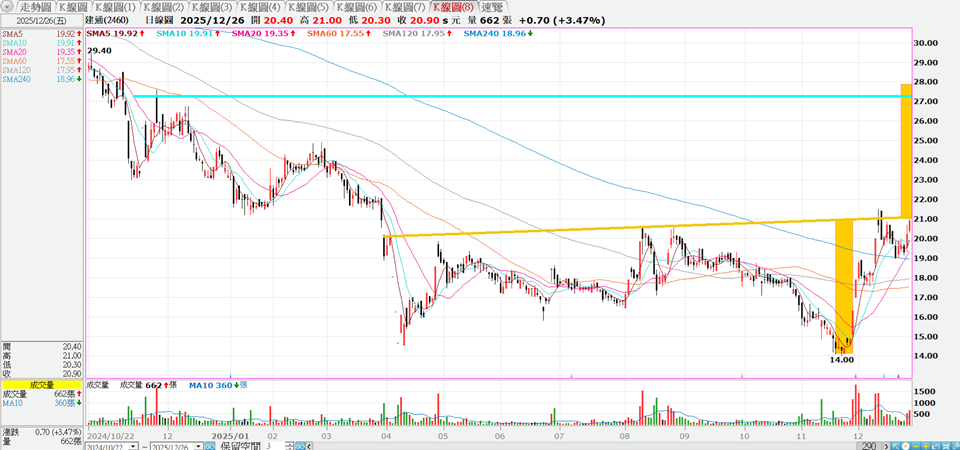  
* 單井(3490)  
  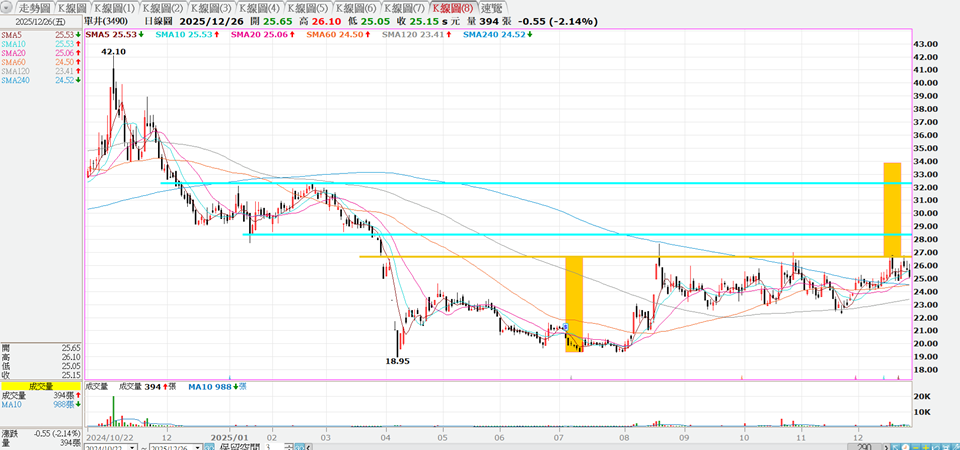  
* 泰鼎-KY(4927)  
  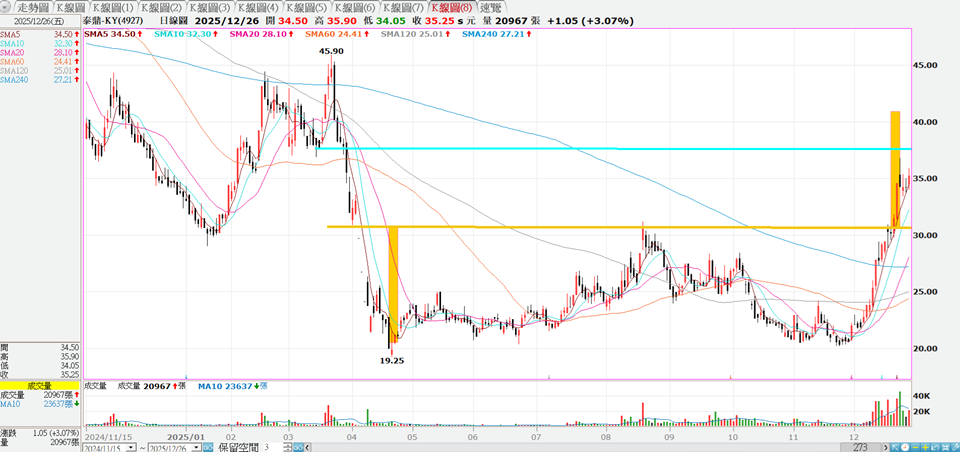  

### 個股解盤  

* 百一(6152)  
  看法：上方壓力仍未過，留上影線平盤作收。  

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'6152')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-25'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-05']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-21'
    bottom_price = range_prices.loc['2025-11-21']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-12-22'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('6152','2024-11-14','2025-12-26',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資中立(0)、融券中立(0)。    